In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np


In [3]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Drop ID column (not useful for prediction)
df = df.drop('customerID', axis=1)


In [6]:
# Convert TotalCharges to numeric (some values are blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Replace missing values with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [7]:
# Convert Churn Yes/No to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(df['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


In [8]:
# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Convert categorical columns into numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)
print(X.head())


Shape after encoding: (7043, 30)
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                            True              False  ...   
1                           False              False  ...   
2                           False           

In [9]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features (important for ML)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data shape:", X_scaled.shape)


Scaled data shape: (7043, 30)


In [10]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (5634, 30)
Test data shape: (1409, 30)


In [11]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=1000)

# Train model on training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [12]:
# Predict on test set
y_pred = model.predict(X_test)

# Predict probabilities (for AUC/ROC later)
y_proba = model.predict_proba(X_test)[:, 1]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8062455642299503
Precision: 0.6573208722741433
Recall: 0.5641711229946524
F1 Score: 0.6071942446043166
ROC-AUC: 0.8418171484667649


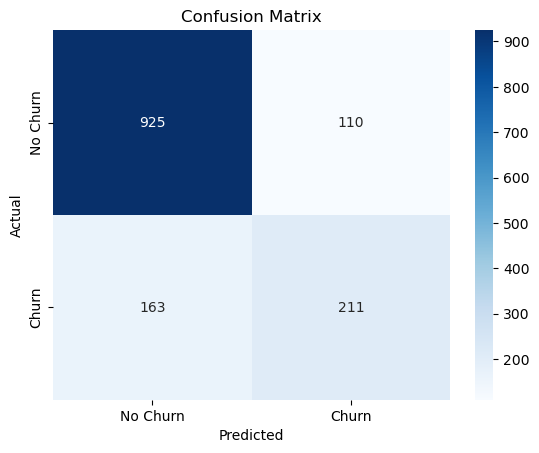

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }


In [17]:
# Convert results into a DataFrame for comparison
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall        F1   ROC-AUC
Logistic Regression  0.806246   0.657321  0.564171  0.607194  0.841817
Decision Tree        0.727466   0.486486  0.481283  0.483871  0.648353
Random Forest        0.786373   0.622074  0.497326  0.552749  0.824886
Gradient Boosting    0.797729   0.653979  0.505348  0.570136  0.841667


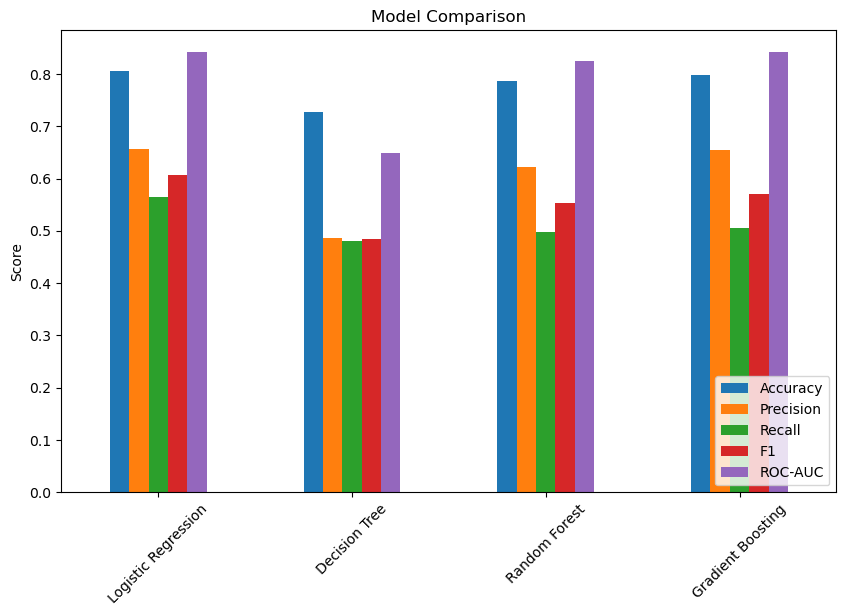

In [18]:
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


In [19]:
import joblib

# Save the trained model and scaler
joblib.dump(models["Random Forest"], "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']